## A3

In [186]:
import pymc as pm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("https://raw.githubusercontent.com/yyluio2/STA365H1_Homework/main/heart.csv")
print(data.columns, data.shape)

theta_0,sigma = 0,1; alpha,beta = 2,0.5
x = data.sample(n=800)['trestbps']

# for e in x:
#   if type(e) != int:
#     print(e)
# ax = plt.subplots(1,1,figsize=(12,6))
# ax[1].hist(x)

normal_gamma = pm.Model()
with normal_gamma:
    dt = pm.Data('observed', x)
    theta = pm.Normal("theta", mu=theta_0, sigma=1)
    phi = pm.Gamma("phi", alpha=alpha, beta=beta)
    x_obs = pm.Normal("likelihood", mu=theta, tau=phi, observed=dt)
    HMC = pm.sample()


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object') (1025, 14)


/usr/local/lib/python3.10/dist-packages/pymc/data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(


HMC Split-Rhats {'theta': 1.0009, 'phi': 1.0017}


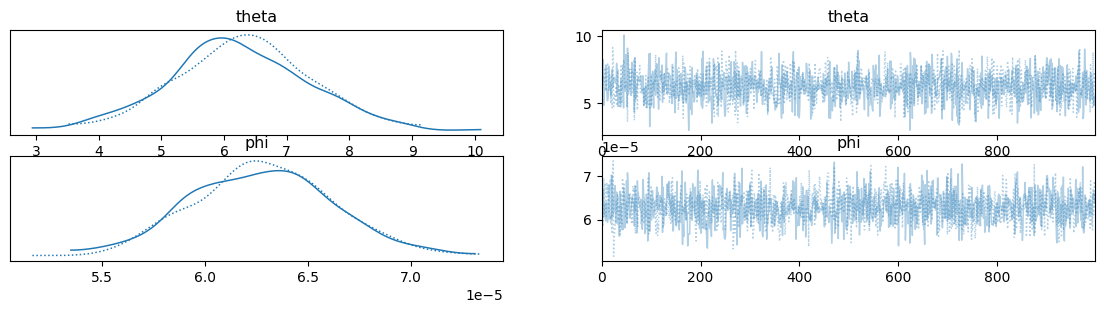

In [187]:
import arviz as az; import matplotlib.pyplot as plt; fig,ax = plt.subplots(2,2, figsize=(14,3))
az.plot_trace(HMC, axes=ax[:2,:2])
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(HMC).items()});

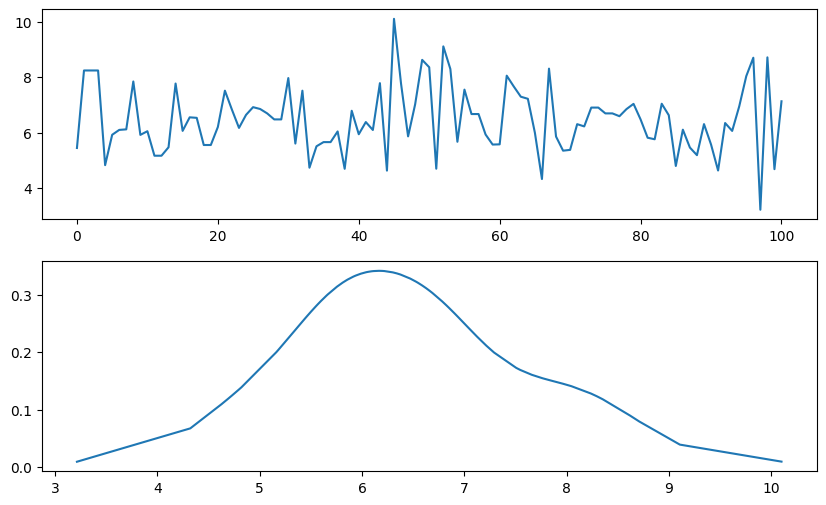

In [188]:
from scipy.stats import gaussian_kde
fig,ax = plt.subplots(2,1, figsize=(10,6))
n = 100

chain = HMC.posterior["theta"].sel(chain=0, draw=slice(0, n)).values;
chain_sorted = sorted(chain)
ax[0].plot(chain);
ax[1].plot(chain_sorted,gaussian_kde(chain_sorted)(chain_sorted));



Autocorrelation for HMC (MCMC) chain 0.14303368631741398


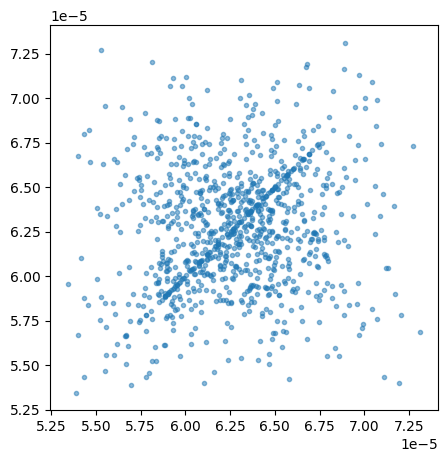

In [189]:
fig,ax = plt.subplots(1,1, figsize=(5,5))
max_mcmc_samples = 1000
mcmc_chain = HMC.posterior["phi"].sel(chain=0, draw=slice(0, max_mcmc_samples-2)).values;
mcmc_chain_one_step_ahead = HMC.posterior["phi"].sel(chain=0, draw=slice(1, max_mcmc_samples-1)).values;
ax.plot(mcmc_chain, mcmc_chain_one_step_ahead, '.', alpha=0.5)

print("Autocorrelation for HMC (MCMC) chain", np.corrcoef(mcmc_chain,mcmc_chain_one_step_ahead)[0,1])

In [190]:
az.summary(HMC, round_to = 5) # Can't figure out why phi acts this way, it seems to stay extremely low regardless of changes in code.

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,6.26895,1.07119,4.29567,8.38106,0.02725,0.01927,1534.74663,1416.83684,1.00092
phi,0.00006,0.00000,0.00006,0.00007,0.00000,0.00000,1615.65432,1280.76916,1.00165


array([<Axes: title={'center': '95.0% HDI'}>], dtype=object)

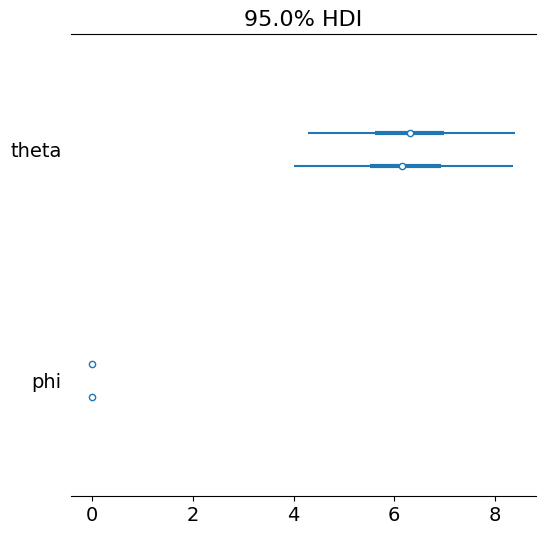

In [191]:
fig,ax = plt.subplots(1,1, figsize=(6,6))
az.plot_forest(HMC, var_names=["theta","phi"], combined=False, hdi_prob=0.95, ax=ax)

In [198]:
x2 = data.sample(n=100)['sex']
non_normal = pm.Model()
with non_normal:
    n=100
    dt = pm.Data('observed', x2)
    prob = pm.Beta("prob", alpha=1, beta=1)
    obs = pm.Binomial("Likelihood", n=n, p=prob, observed = dt)
    HMC2 = pm.sample()

/usr/local/lib/python3.10/dist-packages/pymc/data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(


HMC Split-Rhats {'prob': 0.9999}


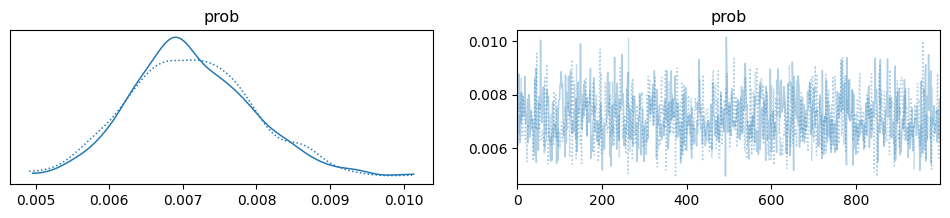

In [199]:
az.plot_trace(HMC2)
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(HMC2).items()})


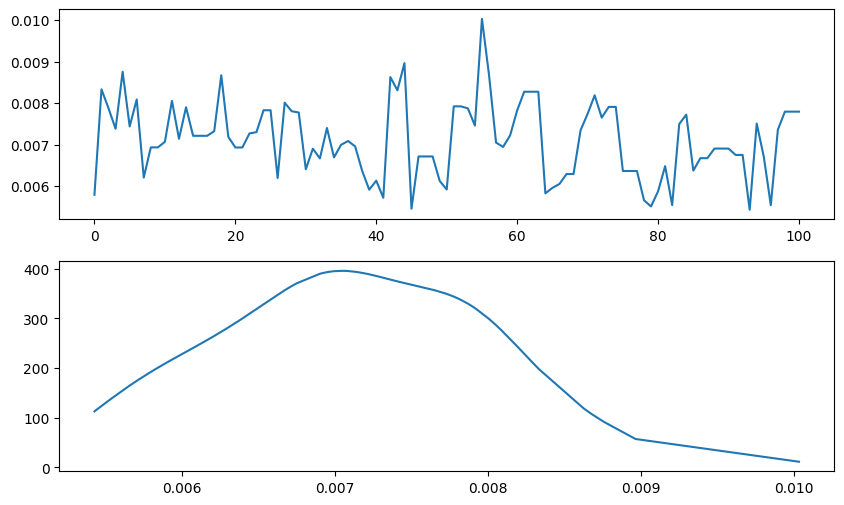

In [200]:
fig,ax = plt.subplots(2,1, figsize=(10,6))
n = 100

chain = HMC2.posterior["prob"].sel(chain=0, draw=slice(0, n)).values
chain_sorted = sorted(chain)
ax[0].plot(chain)
ax[1].plot(chain_sorted,gaussian_kde(chain_sorted)(chain_sorted))

Autocorrelation for HMC (MCMC) chain 0.37267969063254996


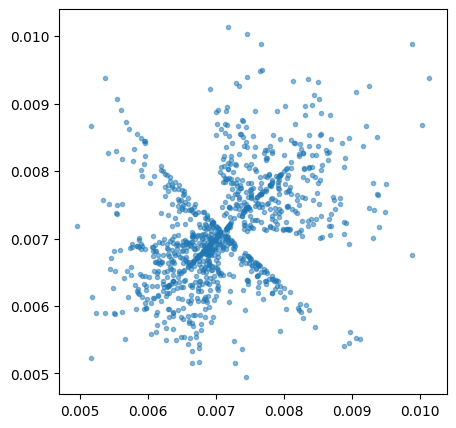

In [201]:
fig,ax = plt.subplots(1,1, figsize=(5,5))
max_mcmc_samples = 1000
mcmc_chain = HMC2.posterior["prob"].sel(chain=0, draw=slice(0, max_mcmc_samples-2)).values;
mcmc_chain_one_step_ahead = HMC2.posterior["prob"].sel(chain=0, draw=slice(1, max_mcmc_samples-1)).values;
ax.plot(mcmc_chain, mcmc_chain_one_step_ahead, '.', alpha=0.5)

print("Autocorrelation for HMC (MCMC) chain", np.corrcoef(mcmc_chain,mcmc_chain_one_step_ahead)[0,1])

In [202]:
az.summary(HMC2, round_to = 5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
prob,0.00712,0.00084,0.00557,0.0087,0.00003,0.00002,887.47936,1532.42232,0.99992


array([<Axes: title={'center': '95.0% HDI'}>], dtype=object)

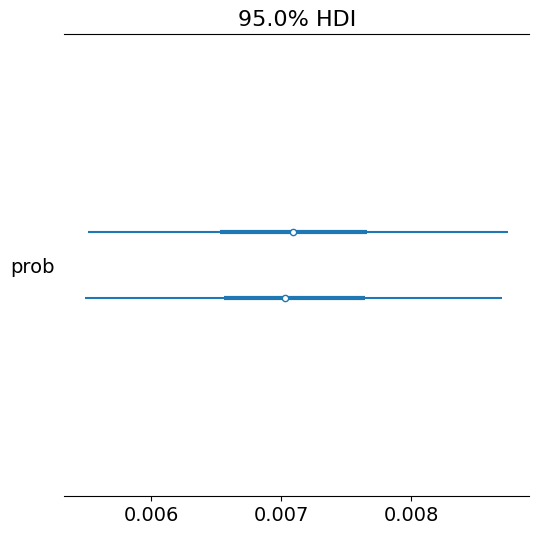

In [203]:
fig,ax = plt.subplots(1,1, figsize=(6,6))
az.plot_forest(HMC2, var_names=["prob"], combined=False, hdi_prob=0.95, ax=ax)